# Assignment introduction
Over the course of the assignment you will find out which "municipality" in the Netherlands is the greenest. You must use the MODIS NDVI and getData's municipal boundaries running the appropriate cell below.



In [22]:
#install and load packages. If you need more, add lines here.

if(!require(sp)) {
  install.packages("sp")
}
if(!require(raster)) {
  install.packages("raster")
}
if(!require(rgdal)) {
  install.packages("rgdal")
}
if(!require(sf)) {
  install.packages("sf")
}
if(!require(rgeos)) {
  install.packages("rgeos", repos="http://R-Forge.R-project.org")
}
library(raster)
library(sp)
library(sf)
library(rgeos)
library(rgdal)
library(testthat)
#library(rstudioapi)


In [3]:
#download and unzip data
#you may modify the extraction directory location and the name of the variable holding the municipality data if you so wish

download.file(url='https://raw.githubusercontent.com/GeoScripting-WUR/VectorRaster/gh-pages/data/MODIS.zip', destfile='data/modis/MODIS.zip', method='auto')
unzip(zipfile='data/modis/MODIS.zip', exdir='data/modis/')
nlMunicipality <- getData('GADM',country='NLD', level=2)

## Assignment 1.1a) Greenest during winter

Find the greenest municipality in January and store the name as a character string named 'greenest_mun_jan' in the cell below.

(hint: remember to reproject the vector data to the projection system of the modis raster data, you should create a variable holding the reprojected municipal boundaries from getData named 'nlMunicipality_reprojected')

In [25]:
### BEGIN SOLUTION

### read in raster data and inspect
MOD <- brick("data/modis/MOD13A3.A2014001.h18v03.005.grd")

#### select required layers and check the data
# January
MODIS_JAN <- MOD[[1]]

# August
MODIS_AUG <- MOD[[8]]

### reproject vector data to match raster crs
nlMunicipality_reprojected <- spTransform(nlMunicipality, CRS(proj4string(MOD)))

#whole year
MODIS_YEAR <- mean(MOD, na.rm = T)
#plot(MODIS_YEAR)
#summary(MODIS_YEAR)

### Extract mean NDVI for each municipality and find municipality with maximum value
#Jan
JAN_avg_NDVI <- extract(MODIS_JAN, nlMunicipality_reprojected, na.rm = T, fun = mean, df = T)
JAN_avg_NDVI$Name <- nlMunicipality_reprojected$NAME_2
greenest_mun_jan <- JAN_avg_NDVI[which.max(JAN_avg_NDVI[[2]]),'Name']

### END SOLUTION

In [15]:
expect_type(greenest_mun_jan,'character')

### BEGIN HIDDEN TESTS
expect_true(greenest_mun_jan,'Littenseradiel')
expect_equal(MOD@crs,nlMunicipality_reprojected@proj4string)
### END HIDDEN TESTS

ERROR: Error in expect_type(greenest_mun_jan, "character"): could not find function "expect_type"


## Assignment 1.1b) During Summer

Now find the greenest municipality in August and store the name as a character string named 'greenest_mun_aug' in the cell below.


In [ ]:
### BEGIN SOLUTION

#August
AUG_avg_NDVI <- extract(MODIS_AUG, nlMunicipality_reprojected, na.rm = T, fun = mean, df = T)
AUG_avg_NDVI$Name <- nlMunicipality_reprojected$NAME_2
greenest_mun_aug <- AUG_avg_NDVI[which.max(AUG_avg_NDVI[[2]]),'Name'] 
#print the name of the greenest mun in aug

### END SOLUTION

In [ ]:
expect_type(greenest_mun_aug,'character')

### BEGIN HIDDEN TESTS
expect_true(greenest_mun_aug,'Vorden')
### END HIDDEN TESTS

## Assignment 1.2) Why is there a difference?

You should have found two different municipalities for January and August. Can you a possible cause for the difference? In a comment in the cell below, add your explanation

# Assignment 1.3) Over the whole year

What is, over a yearly average, the greenest municipality in the Netherlands? Store the result in 'greenest_mun_year'.


In [ ]:
### BEGIN SOLUTION

#whole year
YEAR_avg_NDVI <- extract(MODIS_YEAR, nlMunicipality_reprojected, na.rm = T, fun = mean, df = T)
YEAR_avg_NDVI$Name <- nlMunicipality_reprojected$NAME_2
greenest_mun_year <- YEAR_avg_NDVI[which.max(YEAR_avg_NDVI[[2]]),'Name'] 

### END SOLUTION

In [ ]:
expect_type(greenest_mun_year,'character')

### BEGIN HIDDEN TESTS
expect_true(greenest_mun_year,'Graafstroom')
### END HIDDEN TESTS

# Assignment 2) Plotting

Make a map showing the Netherlands and also where the results to the questions above are. You may either show their shapes or points that are approximately at their center. Include labels for the names of the municipalities.

Warning message:
“use coordinates method”

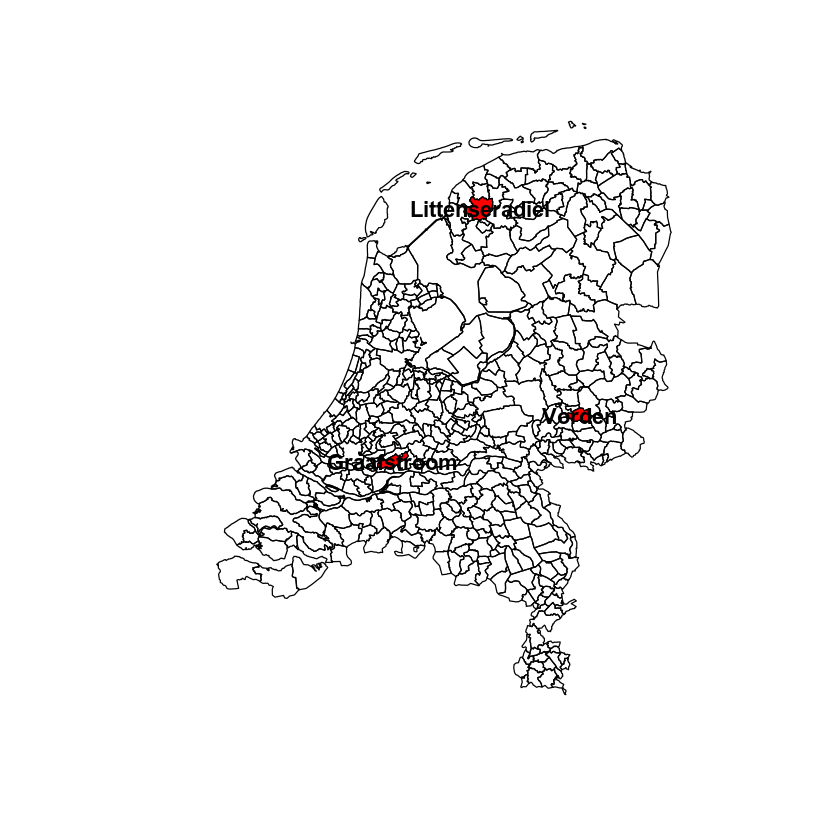

In [31]:
### BEGIN SOLUTION

results_poly <- nlMunicipality_reprojected[nlMunicipality_reprojected@data$NAME_2 %in% c('Graafstroom', 'Littenseradiel', 'Vorden'), ]
plot(nlMunicipality_reprojected)
plot(results_poly,col='red', add=T)
invisible(text(getSpPPolygonsLabptSlots(new),
               labels = as.character(new@data$NAME_2), cex = 1.1, col = "black", font = 2))

# alternate plot method: shaped_raster  <- mask(BiggerRaster, PolyShape)
# then: plot(shaped_raster)

### END SOLUTION

# 3 (Bonus)

What are the greenest provinces (administrative level 1) in the Netherlands? Find your result for January, August and whole year average. Assign the names to 'greenest_prov_jan','greenest_prov_aug' and 'greenest_prov_year'.

You don't need to plot a map.

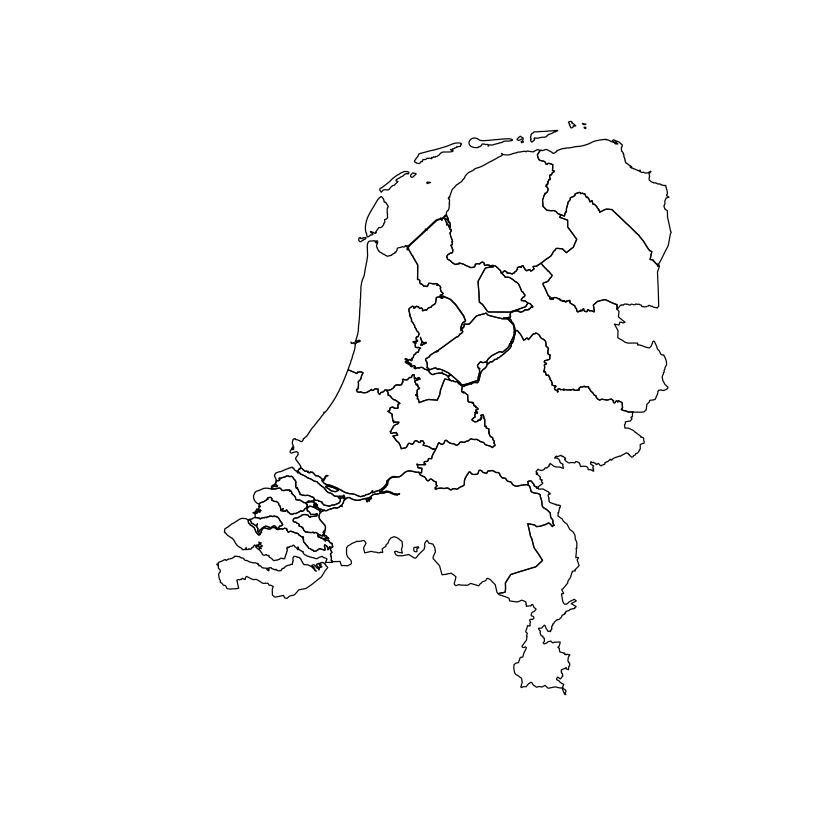

In [11]:
### BEGIN SOLUTION

#aggregate polygons into provinces based on name
nlProvinces <- raster::aggregate(nlMunicipality_reprojected, by = 'NAME_1', dissolve = TRUE)

#now repeat the process done per municipality, but per province

### Extract mean NDVI for each province and find municipality with maximum value
#Jan
JAN_avg_NDVI_prov <- extract(MODIS_JAN, nlProvinces, na.rm = T, fun = mean, df = T)
JAN_avg_NDVI_prov$Name <- nlProvinces$NAME_1
greenest_prov_jan <- JAN_avg_NDVI_prov[which.max(JAN_avg_NDVI_prov[[2]]),'Name']

#August
AUG_avg_NDVI_prov <- extract(MODIS_JAN, nlProvinces, na.rm = T, fun = mean, df = T)
AUG_avg_NDVI_prov$Name <- nlProvinces$NAME_1
greenest_prov_aug <- AUG_avg_NDVI_prov[which.max(AUG_avg_NDVI_prov[[2]]),'Name']

#whole year
YEAR_avg_NDVI_prov <- extract(MODIS_YEAR, nlProvinces, na.rm = T, fun = mean, df = T)
YEAR_avg_NDVI_prov$Name <- nlProvinces$NAME_1
greenest_prov_year <- YEAR_avg_NDVI_prov[which.max(YEAR_avg_NDVI_prov$layer),'Name']

### END SOLUTION

In [ ]:
expect_type(greenest_prov_jan,'character')
expect_type(greenest_prov_aug,'character')
expect_type(greenest_prov_year,'character')

### BEGIN HIDDEN TESTS
expect_true(greenest_prov_jan,'Utrecht')
expect_true(greenest_prov_aug,'Utrecht')
expect_true(greenest_prov_year,'Overijssel')
### END HIDDEN TESTS